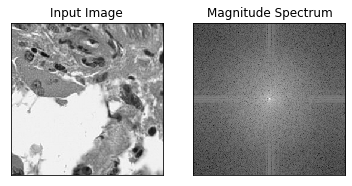

In [2]:
# Using Numpy
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
fshift.shape

(256, 256)

In [4]:
f[0,0],fshift[128,128],fshift[0,0]

((11667223+0j), (11667223+0j), (169+0j))

In [5]:
 20*np.log(np.abs(fshift[128,128]))

325.4458803072587

In [6]:
20*np.log(np.abs(fshift[0,0]))

102.59797429846147

In [ ]:
magnitude_spectrum.shape

In [ ]:
magnitude_spectrum[0,0] ## Frequency - Amplitude

In [ ]:
magnitude_spectrum[128,128] # Average amplitude of the img

In [ ]:
img.shape

In [ ]:
img[0,0] ## Spatial Domain

In [ ]:
f.shape, f[0,0]

In [ ]:
20*np.log(np.abs(f[0,0])) 
## FFT of F[0,0] - Average magnitude of the img, shifted to magnitude_spectrum[128,128]

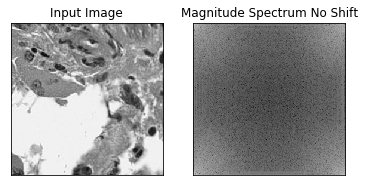

In [7]:
# Without Shifting 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png',0)
f1 = np.fft.fft2(img)
#fshift = np.fft.fftshift(f)
magnitude_spectrum_noshift = 20*np.log(np.abs(f1))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_noshift, cmap = 'gray')
plt.title('Magnitude Spectrum No Shift'), plt.xticks([]), plt.yticks([])
plt.show()

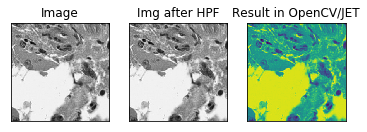

In [8]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Img after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in OpenCV/JET'), plt.xticks([]), plt.yticks([])

plt.show()

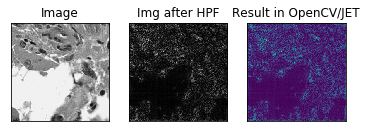

In [9]:
# Inverse FFT, Numpy
rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Img after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in OpenCV/JET'), plt.xticks([]), plt.yticks([])

plt.show()